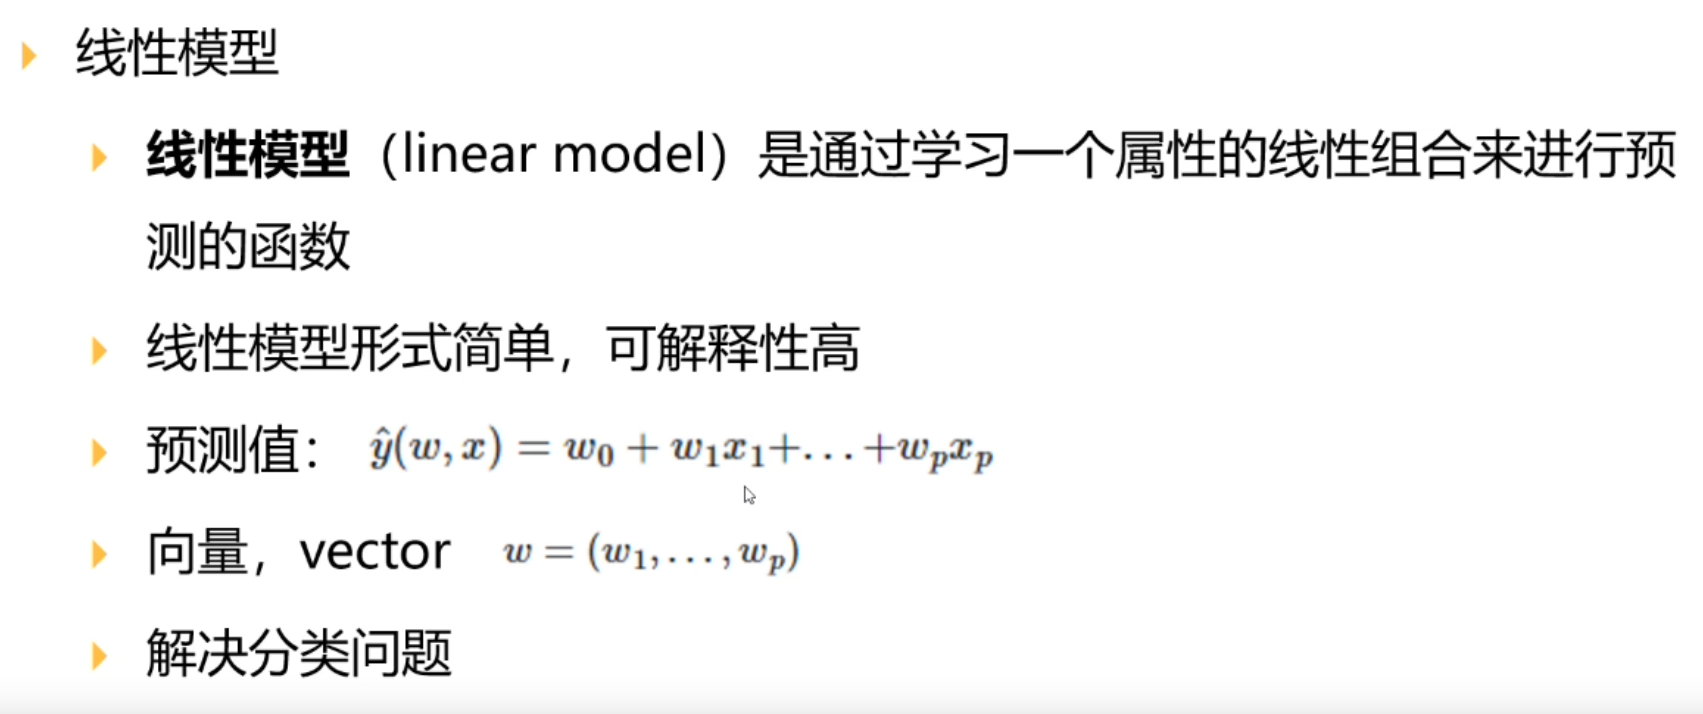

Coefficients: 
 [938.23786125] 152.91886182616113
Mean squared error: 2548.07
Coefficient of determination: 0.47


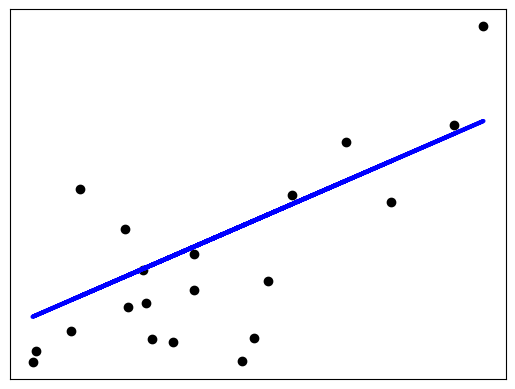

In [18]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_,regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f"
      % r2_score(diabetes_y_test, diabetes_y_pred))
        
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()



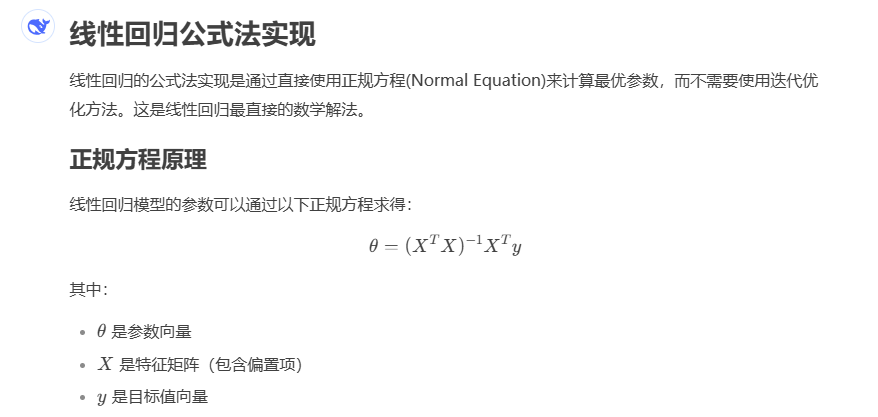

Coefficients: 
 [152.91886183 938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


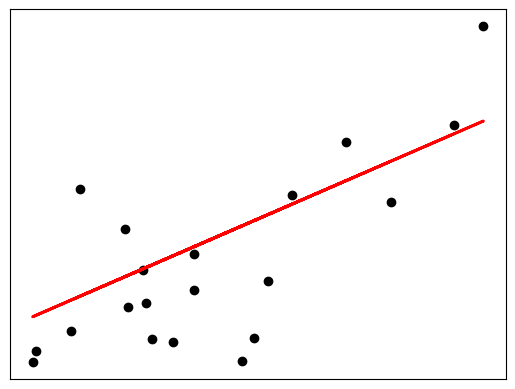

In [7]:
class LinearRegression:
    def __init__(self):
        self.theta = None

    def fit(self, X, y):
        n = len(X)
        X_b = np.hstack((np.ones((n, 1)), X))
        self.theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T.dot(y))
        return self
    
    def predict(self, X):
        X_b = np.hstack((np.ones((len(X), 1)), X))
        return X_b.dot(self.theta)


# Create linear regression object
model = LinearRegression()

# Train the model using the training sets
model.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = model.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', model.theta)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f"
      % r2_score(diabetes_y_test, diabetes_y_pred))
        
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='red', linewidth=2)

plt.xticks(())
plt.yticks(())

plt.show()

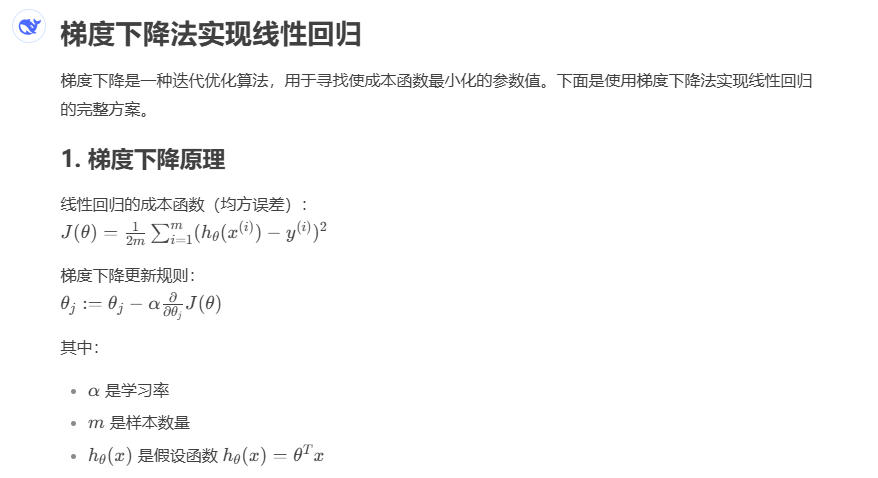

Coefficients: 
 [938.22653488] 152.9188671946177
Mean squared error: 2548.09
Coefficient of determination: 0.47


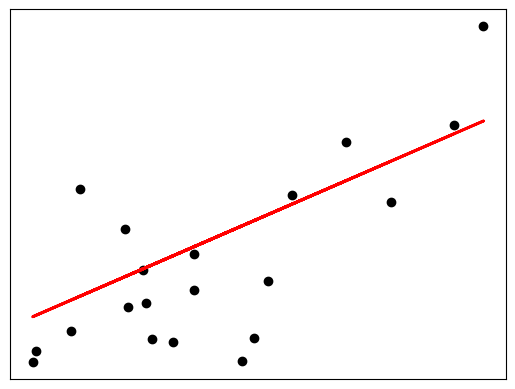

In [19]:
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, n_iters=10000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.w = np.zeros(n_features)
        self.b = 0

        # gradient descent
        for i in range(self.n_iters):
            y_predicted = np.dot(X, self.w) + self.b
            # compute gradients
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)
            # update parameters
            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        y_predicted = np.dot(X, self.w) + self.b
        return y_predicted
    
# Create linear regression object
model = LinearRegressionGD(learning_rate=0.1, n_iters=50000)

# Train the model using the training sets
model.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = model.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', model.w,model.b)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f"
      % r2_score(diabetes_y_test, diabetes_y_pred))
        
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='red', linewidth=2)

plt.xticks(())
plt.yticks(())

plt.show()